# Introduction to (Py)Stan

# Installation

- Requirements: numpy & Cython
- Might help to have an anaconda environment
- `pip install pystan`
- We'll also use corner
    - `pip install corner`, or
    - `git clone https://github.com/dfm/corner.py.git`, then
    `python setup.py install`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pystan as stan
import corner
%matplotlib inline

# Basics of Stan

- Have data and a probabilistic model with parameters that needs sampling
- Need to create a Stan model with basic contents:
    - data
    - parameters
    - model
- Stan model must be described in a single string written in Stan code
- Start with fitting for a line
\begin{equation}
y = ax + b
\end{equation}

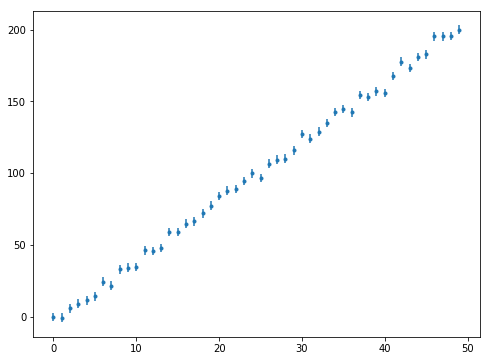

In [2]:
x, y = np.loadtxt("linedat.txt")

plt.figure(figsize=(8,6))
plt.errorbar(x, y, yerr=3, fmt='.')
plt.show()

# Model for a line

- Data, $d_i= \{ x_i, y_i \}$, each $y_i$ measured with noise = 3
- Parameters, $\theta = \{ a, b \}$
    - $0 < a < 8$
    - $-5 < b < 5$
- Model: 

\begin{equation}
p(\theta\, |\, D) = p(D\,|\,\theta) p(\theta)
\end{equation}

\begin{equation}
p(D\,|\,\theta) = \prod_i \mathcal{N}(\,y_i\, |\, ax_i + b, 3^2)
\end{equation}

In [ ]:
SampleCode = """
data {
    type variable; // This is how you comment
    int n; // Defining an integer
    real r; // Defining a real number
    real[n] rs; // Defining an array of reals with size n
    vector[n] v; // Defining a vector of size n (Same as above, but can vectorize operations)
    
    int<lower=0> pos; // Defining a positive definite integer
    real<lower=-4.6, upper=7.8> rl; // Defining a real number with a strict range
    vector<lower=-10, upper=10>[n] vec; // Defining a restricted vector with size n
}

parameters{
    type par; // More comments
}

transformed parameters{
    vector[n] true = par*vec + rl; // 
}

model {
    measured ~ normal(true, error); // Sampling from a normal distribution, OR
    for (i in 1:n) {
        v[i] ~ normal(true[i], error)
    };
    
    par ~ uniform(low, up); // Sampling from a uniform prior
}
"""

In [ ]:
SampleCode = """
data {
    type variable; // This is how you comment
}
"""

In [ ]:
SampleCode = """
data {
    type variable; // This is how you comment
    int n; // Defining an integer
    real r; // Defining a real number
    real[n] rs; // Defining an array of reals with size n
    vector[n] v; // Defining a vector of size n (Same as above, but can vectorize operations)
    
    int<lower=0> pos; // Defining a positive definite integer
    real<lower=-4.6, upper=7.8> rl; // Defining a real number with a strict range
    vector<lower=-10, upper=10>[n] vec; // Defining a restricted vector with size n
}

In [ ]:
SampleCode = """
data {
    type variable; // This is how you comment
    int n; // Defining an integer
    real r; // Defining a real number
    real[n] rs; // Defining an array of reals with size n
    vector[n] v; // Defining a vector of size n (Same as above, but can vectorize operations)
    
    int<lower=0> pos; // Defining a positive definite integer
    real<lower=-4.6, upper=7.8> rl; // Defining a real number with a strict range
    vector<lower=-10, upper=10>[n] vec; // Defining a restricted vector with size n
}

parameters{
    type par; // More comments
}

transformed parameters{
    vector[n] true = par*vec + rl; // Sometimes need "." before operator for vectors
}

In [ ]:
SampleCode = """
data {
    type variable; // This is how you comment
    int n; // Defining an integer
    real r; // Defining a real number
    real[n] rs; // Defining an array of reals with size n
    vector[n] v; // Defining a vector of size n (Same as above, but can vectorize operations)
    
    int<lower=0> pos; // Defining a positive definite integer
    real<lower=-4.6, upper=7.8> rl; // Defining a real number with a strict range
    vector<lower=-10, upper=10>[n] vec; // Defining a restricted vector with size n
}

parameters{
    type par; // More comments
}

transformed parameters{
    vector[n] true = par*vec + rl; // 
}

model {
    measured ~ normal(true, error); // Sampling from a normal distribution, OR
    for (i in 1:n) {
        v[i] ~ normal(true[i], error)
    };
    
    par ~ uniform(low, up); // Sampling from a uniform prior
}
"""

# Model for a line

- Data, $d_i= \{ x_i, y_i \}$, each $y_i$ measured with noise = 3
- Parameters, $\theta = \{ a, b \}$
    - $0 < a < 8$
    - $-5 < b < 5$
- Model: 

\begin{equation}
p(\theta\, |\, D) = p(D\,|\,\theta) p(\theta)
\end{equation}

\begin{equation}
p(D\,|\,\theta) = \prod_i \mathcal{N}(\,y_i\, |\, ax_i + b, 3^2)
\end{equation}

In [3]:
LineCode = """
data {
    int<lower=0> n; // Number of data points
    vector[n] x;
    vector[n] y;
}

parameters {
    real<lower=0, upper=8> a; // Slope
    real<lower=-5, upper=5> b; // Intercept
}

transformed parameters {
    vector[n] y_guess = a*x + b;
}

model{
    y ~ normal(y_guess, 3);
}
"""

In [4]:
LineModel = stan.StanModel(model_code=LineCode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3af224889cd18b104d6f496cdf3a34d8 NOW.


# Sampling with the model

In [5]:
LineData = {"n" : x.size, 
            "x" : x, 
            "y" : y}

LineFit = LineModel.sampling(data=LineData, warmup=100, iter=1000, chains=4)

/home/victor/anaconda2/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


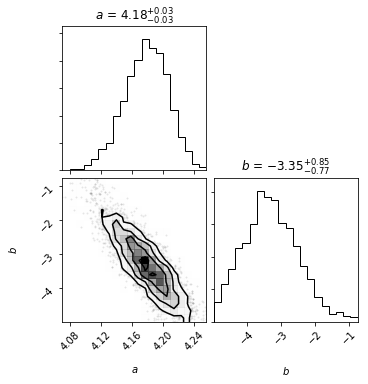

In [6]:
P = LineFit.extract(permuted=1)
LineSamples = np.swapaxes(np.array([P['a'], P['b']]), 0, 1)
fig = corner.corner(LineSamples, labels=["$a$", "$b$"], show_titles=1)

# Adding Custom Functions

In [ ]:
SampleCode = """
functions {
    real customPrior_lpdf(vector vec, real x) {
        return sum(x*log(vec))
    }
}

data {
    type variable; // This is how you comment
    int n; // Defining an integer
    real r; // Defining a real number
    real[n] rs; // Defining an array of reals with size n
    vector[n] v; // Defining a vector of size n (Same as above, but can vectorize operations)
    
    int<lower=0> pos; // Defining a positive definite integer
    real<lower=-4.6, upper=7.8> rl; // Defining a real number with a strict range
    vector<lower=-10, upper=10>[n] vec; // Defining a restricted vector with size n
}

parameters{
    type par; // More comments
}

transformed parameters{
    vector[n] true = par*vec + rl; // 
}

model {
    measured ~ normal(true, error); // Sampling from a normal distribution, OR
    for (i in 1:n) {
        v[i] ~ normal(true[i], error)
    };
    
    par ~ uniform(low, up); // Sampling from a uniform prior
}
"""

# Transformed Data

- Define with a `transformed data {}` block
- Similar to `transformed parameters`, but uses only objects declared in `data`
- Can use to define constants, etc.

# Useful options for sampling

- `pars` lets you choose which parameters to keep.
- You can save every `thin`-th sample with this option
- Choose your own initial step with `init`

# Stan Users Guide

- http://mc-stan.org/users/documentation/, OR Google "stan documentation"
- Very extensive and well written
- Contains many useful pre-defined functions & lpdfs
- Look here for more complicated syntax/operations